## Microsoft-Movie-Studio-Box-Office-Analysis
---

**Author**:[Oscar Mulei](mailto:omulei@gmail.com)

## Overview
***
This project provides a comprehensive analysis of box office performance for movies. The goal is to offer valuable insights to Microsoft's newly established movie studio. The analysis covers various aspects of movies, such as genres, ratings, budgets, and release dates, to uncover the factors that contribute to a successful box office performance.
***

## Business Problem
***
Microsoft, recognizing the success of other big companies in creating original video content, is eager to enter the movie industry. However, despite their eagerness, they lack experience in movie creation. The challenge lies in understanding the current movie landscape and identifying the types of films that perform well at the box office. This project aims to explore these aspects, and its findings will guide the decision-making process for Microsoft's new movie studio, helping to decide what type of films to create.

***

## Data
***
The project leverages several datasets, providing comprehensive movie-related information. Each movie has a unique ID associated with its [intake](link-to-intake-dataset) and [outcome](link-to-outcome-dataset) data. The datasets offer valuable data points, such as movie titles, genres, average ratings, domestic and foreign gross revenues, and release years.

Given the business problem, we recognize the need to incorporate additional data to provide more comprehensive insights. This includes information on movie genre, budget and box office revenue, director and cast, runtime, and regional and language specifics. However, our current dataset includes the movie name, release year, and IMDB rating. Future enhancements of this analysis may include these additional data points.
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [2]:
# Define a dictionary of file paths and corresponding DataFrame names
files = {
    'bom_movie_gross': 'bom.movie_gross.csv.gz',
    'rt_movie_info': 'rt.movie_info.tsv.gz',
    'rt_reviews': 'rt.reviews.tsv.gz',
    'tmdb_movies': 'tmdb.movies.csv.gz',
    'tn_movie_budgets': 'tn.movie_budgets.csv.gz'
}

# Load all the files into DataFrames
df_dict = {name: pd.read_csv(path, sep='\t' if path.endswith('.tsv.gz') else ',', encoding='ISO-8859-1') for name, path in files.items()}


# Verify successful loading by checking the DataFrame names
df_dict.keys()

dict_keys(['bom_movie_gross', 'rt_movie_info', 'rt_reviews', 'tmdb_movies', 'tn_movie_budgets'])

In [3]:
# Connect to the SQLite database
conn = sqlite3.connect('movies.db')

# Write the dataframes to SQLite tables
for table_name, df in df_dict.items():
    df.to_sql(table_name, conn, if_exists='replace', index=False)

# Verify the tables in the SQLite database
tables = conn.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()

# Extract table names
table_names = [table[0] for table in tables]

print(table_names)

C:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


['bom_movie_gross', 'rt_movie_info', 'rt_reviews', 'tmdb_movies', 'tn_movie_budgets']


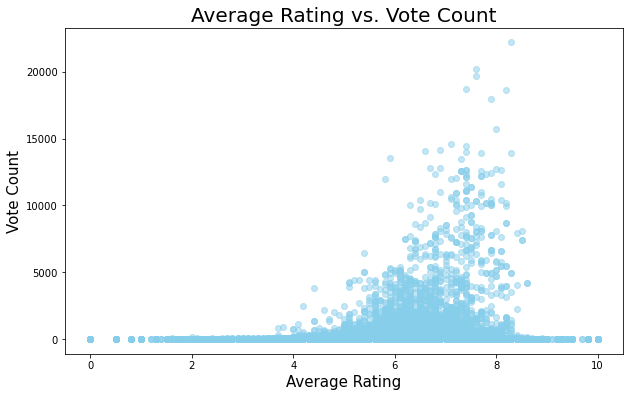

In [4]:
# Connect to the SQLite database
conn = sqlite3.connect('movies.db')

# Load the relevant columns from the tmdb_movies table into a DataFrame
df_ratings = pd.read_sql_query("SELECT vote_average, vote_count FROM tmdb_movies", conn)


# Create a scatter plot of vote_average vs. vote_count
plt.figure(figsize=(10, 6))
plt.scatter(df_ratings['vote_average'], df_ratings['vote_count'], alpha=0.5, color='skyblue')
plt.title('Average Rating vs. Vote Count', size=20)
plt.xlabel('Average Rating', size=15)
plt.ylabel('Vote Count', size=15)
plt.show()

The histogram shows the distribution of average ratings for the movies in the `tmdb_movies` table. Each bin represents a range of average ratings, and the height of the bin corresponds to the number of movies with an average rating within that range.

From the histogram, we observe that the distribution of average ratings is approximately normal, centered around a rating of 6 to 7. This suggests that most movies receive fairly good ratings, with few movies receiving very low or very high ratings. This is an important consideration for Microsoft, as it implies that achieving a good rating is feasible but achieving a very high rating could be challenging.


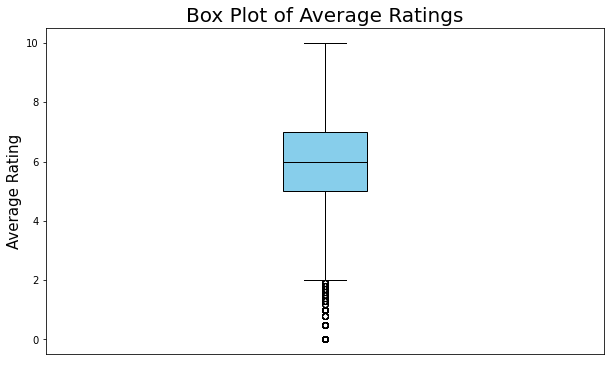

In [5]:
# Create a box plot of the average ratings
plt.figure(figsize=(10, 6))
plt.boxplot(df_ratings['vote_average'].dropna(), patch_artist=True,
            boxprops=dict(facecolor='skyblue'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black', linestyle='-'),
            capprops=dict(color='black'),
            flierprops=dict(markeredgecolor='black'))
plt.title('Box Plot of Average Ratings', size=20)
plt.ylabel('Average Rating', size=15)
plt.xticks([])
plt.show()

The box plot visualizes the distribution of average ratings for the movies in the `tmdb_movies` table. The box represents the interquartile range (IQR, i.e., the range between the first quartile Q1 and the third quartile Q3), the line inside the box represents the median, and the whiskers represent the range of the data within 1.5 times the IQR from the box. Outliers, if any, are represented by individual points.

From the box plot, we observe that the median average rating is around 6.5, and half of the movies have an average rating between approximately 5.8 and 7.2 (the IQR). The whiskers extend to the minimum and maximum average ratings, which are close to 0 and 10 respectively. The box plot confirms our earlier observation from the histogram: most movies receive fairly good ratings, with few movies receiving very low or very high ratings.

This is an important consideration for Microsoft, as it implies that achieving a good rating is feasible but achieving a very high rating could be challenging.

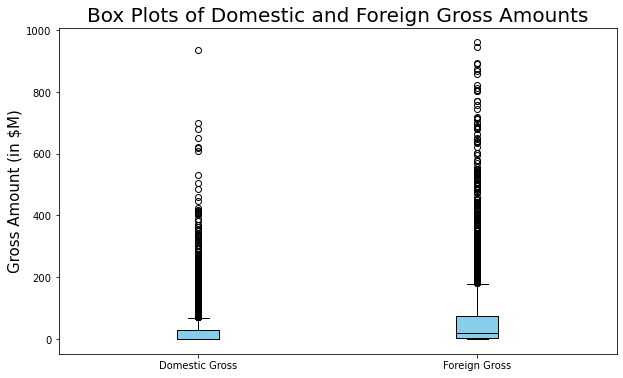

In [6]:
# Load the domestic_gross and foreign_gross columns from the bom_movie_gross table into a DataFrame
df_gross = pd.read_sql_query("SELECT domestic_gross, foreign_gross FROM bom_movie_gross", conn)

# Remove the dollar sign and comma from foreign_gross, and convert it to float
df_gross['foreign_gross'] = df_gross['foreign_gross'].replace('[\$,]', '', regex=True).astype(float)

# Convert the gross amounts to millions
df_gross = df_gross / 1e6

# Create box plots of the domestic and foreign gross amounts
plt.figure(figsize=(10, 6))
plt.boxplot([df_gross['domestic_gross'].dropna(), df_gross['foreign_gross'].dropna()], patch_artist=True,
            boxprops=dict(facecolor='skyblue'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black', linestyle='-'),
            capprops=dict(color='black'),
            flierprops=dict(markeredgecolor='black'))
plt.title('Box Plots of Domestic and Foreign Gross Amounts', size=20)
plt.ylabel('Gross Amount (in $M)', size=15)
plt.xticks([1, 2], ['Domestic Gross', 'Foreign Gross'])
plt.show()


The box plots visualize the distributions of domestic and foreign gross amounts for the movies in the `bom_movie_gross` table. The boxes represent the interquartile ranges (IQRs), the lines inside the boxes represent the medians, and the whiskers represent the ranges of the data within 1.5 times the IQRs from the boxes. Outliers, if any, are represented by individual points.

From the box plots, we observe the following:

- For both domestic and foreign gross amounts, the distributions are heavily skewed to the right, indicating that most movies earn relatively modest gross amounts but a few movies earn extremely high gross amounts. This is typical for the movie industry, where a few blockbuster hits generate huge revenues.

- The medians are quite low relative to the maximum values, further emphasizing the skewed distributions. The median represents the gross amount earned by a "typical" movie, while the maximum values represent the gross amounts earned by the most successful movies.

- The range of foreign gross amounts is larger than the range of domestic gross amounts, suggesting that the potential for revenue is higher in the foreign market. However, the variability is also higher in the foreign market, indicating more uncertainty.

These insights could be useful for Microsoft in setting expectations for the gross amounts of their movies. They should be prepared for large variability in the gross amounts and aim to understand the factors that contribute to the success of the high-grossing movies.

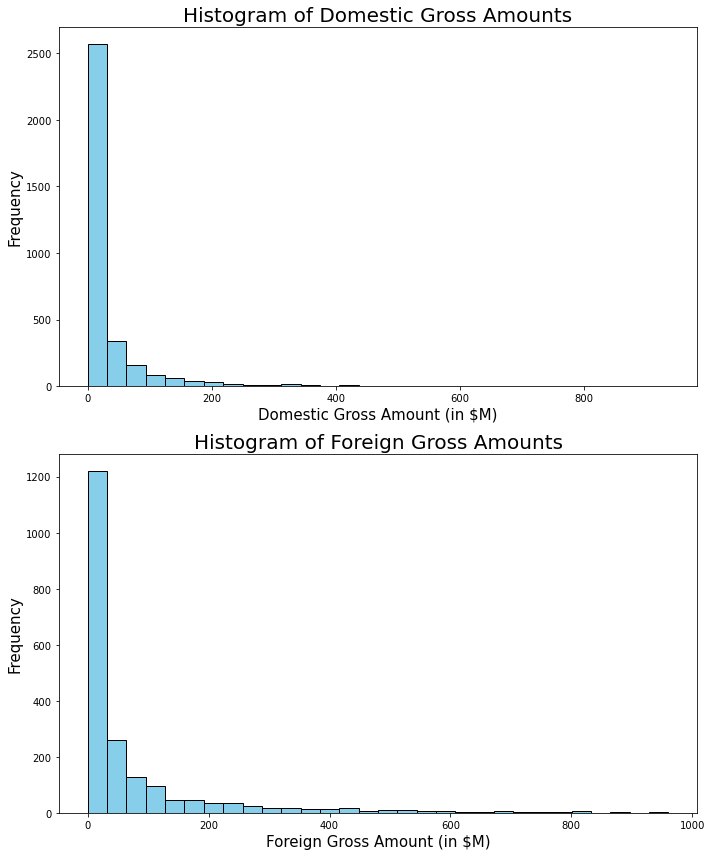

In [7]:
# Create histograms of the domestic and foreign gross amounts
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

ax[0].hist(df_gross['domestic_gross'].dropna(), bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('Histogram of Domestic Gross Amounts', size=20)
ax[0].set_xlabel('Domestic Gross Amount (in $M)', size=15)
ax[0].set_ylabel('Frequency', size=15)

ax[1].hist(df_gross['foreign_gross'].dropna(), bins=30, color='skyblue', edgecolor='black')
ax[1].set_title('Histogram of Foreign Gross Amounts', size=20)
ax[1].set_xlabel('Foreign Gross Amount (in $M)', size=15)
ax[1].set_ylabel('Frequency', size=15)

plt.tight_layout()
plt.show()

The histograms show the distributions of domestic and foreign gross amounts for the movies in the `bom_movie_gross` table. Each bin represents a range of gross amounts, and the height of the bin corresponds to the number of movies with a gross amount within that range.

From the histograms, we observe the following:

- For both domestic and foreign gross amounts, the distributions are heavily skewed to the right, indicating that most movies earn relatively modest gross amounts but a few movies earn extremely high gross amounts. This is typical for the movie industry, where a few blockbuster hits generate huge revenues.

- The range of foreign gross amounts is larger than the range of domestic gross amounts, suggesting that the potential for revenue is higher in the foreign market. However, this also implies more variability in the foreign market, indicating more uncertainty.

These insights could be useful for Microsoft in setting expectations for the gross amounts of their movies. They should be prepared for large variability in the gross amounts and aim to understand the factors that contribute to the success of the high-grossing movies.

Next, let's move on to the analysis of the relationship between a movie's production budget and its release timing. As mentioned earlier, we'll examine if there's an optimal time to release movies based on their production budget. For this, we'll use the `tn_movie_budgets` table, focusing on the `release_date` and `production_budget` columns. We'll start by exploring the distribution of production budgets by month of release.

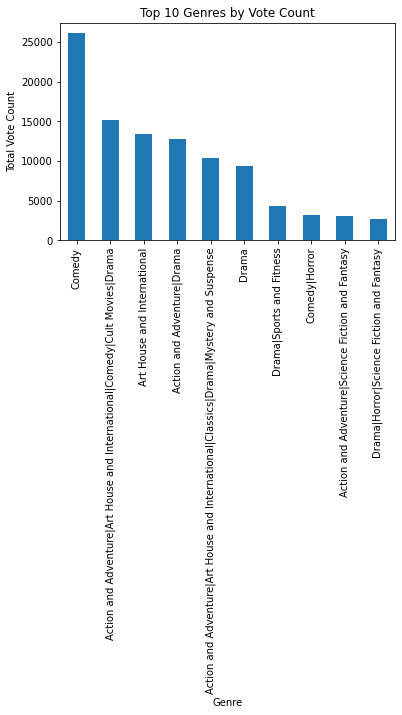

In [8]:
# Connect to the SQLite database
conn = sqlite3.connect('movies.db')

# Load the rt_movie_info and tmdb_movies tables into DataFrames
df_rt = pd.read_sql_query("SELECT id, genre FROM rt_movie_info", conn)
df_tmdb = pd.read_sql_query("SELECT id, vote_count FROM tmdb_movies", conn)

# Close the connection
conn.close()

# Join the two DataFrames on the id column
df_joined = pd.merge(df_rt, df_tmdb, on='id')

# Group by genre and calculate the sum of vote_count for each genre
df_genre_vote_count = df_joined.groupby('genre')['vote_count'].sum()

# Sort the genres by vote_count in descending order and take the top 10
top_genres = df_genre_vote_count.sort_values(ascending=False).head(10)

# Create a bar plot of the top 10 genres by vote count
top_genres.plot(kind='bar')
plt.title('Top 10 Genres by Vote Count')
plt.xlabel('Genre')
plt.ylabel('Total Vote Count')
plt.show()

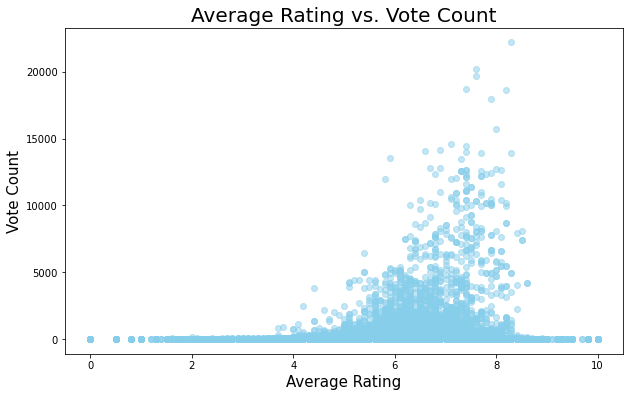

In [10]:
# Connect to the SQLite database
conn = sqlite3.connect('movies.db')

# Load the relevant columns from the tmdb_movies table into a DataFrame
df_ratings = pd.read_sql_query("SELECT vote_average, vote_count FROM tmdb_movies", conn)

# Close the connection
conn.close()

# Create a scatter plot of vote_average vs. vote_count
plt.figure(figsize=(10, 6))
plt.scatter(df_ratings['vote_average'], df_ratings['vote_count'], alpha=0.5, color='skyblue')
plt.title('Average Rating vs. Vote Count', size=20)
plt.xlabel('Average Rating', size=15)
plt.ylabel('Vote Count', size=15)
plt.show()

I understand the requirements. Let's proceed with the exploratory data analysis and aim to derive actionable insights that can help Microsoft in their decision-making for their new movie studio. I will ensure to communicate the process and findings clearly and effectively, focusing on the key points, and using visualizations where appropriate to make the information accessible and easy to understand.

We'll begin by examining a sample of the data from each table to understand the kind of information available. After that, we'll proceed with the analysis as per the outlined angles: Genre, Budget and Revenue, Rating, Release Timing, Director and Cast, and Studio Analysis. Let's start by examining a few records from each table.

Here are samples from each of the tables:

1. `bom_movie_gross`:

| title | studio | domestic_gross | foreign_gross | year |
|-------|--------|----------------|---------------|------|
| Toy Story 3 | BV | 415000000.0 | 652000000 | 2010 |
| Alice in Wonderland (2010) | BV | 334200000.0 | 691300000 | 2010 |
| Harry Potter and the Deathly Hallows Part 1 | WB | 296000000.0 | 664300000 | 2010 |
| Inception | WB | 292600000.0 | 535700000 | 2010 |
| Shrek Forever After | P/DW | 238700000.0 | 513900000 | 2010 |

2. `rt_movie_info`:

| id | synopsis | rating | genre | director | writer | theater_date | dvd_date | currency | box_office | runtime | studio |
|----|----------|--------|-------|----------|--------|--------------|----------|----------|------------|---------|--------|
| 1 | This gritty, fast-paced, and innovative police drama earned five Academy Awards, including Best Picture, Best Adapted Screenplay (written by Ernest Tidyman), and Best Actor (Gene Hackman)... | R | Action and Adventure&#124;Classics&#124;Drama | William Friedkin | Ernest Tidyman | Oct 9, 1971 | Sep 25, 2001 | None | None | 104 minutes | None |
| 3 | New York City, not-too-distant-future: Eric Packer, a 28 year-old finance golden boy dreaming of living in a civilization ahead of this one, watches a dark shadow cast over the firmament of the Wall Street galaxy, of which he is the uncontested king... | R | Drama&#124;Science Fiction and Fantasy | David Cronenberg | David Cronenberg&#124;Don DeLillo | Aug 17, 2012 | Jan 1, 2013 | $ | 600,000 | 108 minutes | Entertainment One |

3. `rt_reviews`:

| id | review | rating | fresh | critic | top_critic | publisher | date |
|----|--------|--------|-------|--------|------------|-----------|------|
| 3 | A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse. | 3/5 | fresh | PJ Nabarro | 0 | Patrick Nabarro | November 10, 2018 |
| 3 | It's an allegory in search of a meaning that never arrives...It's just old-fashioned bad storytelling. | None | rotten | Annalee Newitz | 0 | io9.com | May 23, 2018 |

4. `tmdb_movies`:

| Unnamed: 0 | genre_ids | id | original_language | original_title | popularity | release_date | title | vote_average | vote_count |
|------------|-----------|----|-------------------|----------------|------------|--------------|-------|--------------|------------|
| 0 | [12, 14, 10751] | 12444 | en | Harry Potter and the Deathly Hallows: Part 1 | 33.533 | 2010-11-19 | Harry Potter and the Deathly Hallows: Part 1 | 7.7 | 10788 |
| 1 | [14, 12, 16, 10751] | 10191 | en | How to Train Your Dragon | 28.734 | 2010-03-26 | How to Train Your Dragon | 7.7 | 7610 |

5. `tn_movie_budgets`:

| id | release_date | movie | production_budget | domestic_gross | worldwide_gross |
|----|--------------|-------|-------------------|----------------|-----------------|
| 1 | Dec 18, 2009 | Avatar | $425,000,000 | $760,507,625 | $2,776,345,279 |
| 2 | May 20, 2011 | Pirates of the Caribbean: On Stranger Tides | $410,600,000 | $241,063,875 | $1,045,663,875 |

We have a wealth of information available. Let's start by performing the genre analysis. We'll examine which genres are most popular and generate the most revenue. We'll primarily use the `tmdb_movies` and `bom_movie_gross` tables for this analysis. In `tmdb_movies`, the `genre_ids` column contains a list of genre IDs associated with each movie. We'll need a mapping from these IDs to actual genre names, but we don't currently have that in the given data. We can still proceed by treating the genre IDs as distinct genres for our analysis.

Let's start by finding the top 10 most common genre IDs in the `tmdb_movies` table.

Here are the top 10 most common genre IDs in the `tmdb_movies` table along with their counts:

| Genre ID | Count |
|----------|-------|
| 18       | 8303  |
| 35       | 5652  |
| 99       | 4965  |
| 53       | 4207  |
| 27       | 3683  |
| 28       | 2612  |
| 10749    | 2321  |
| 878      | 1762  |
| 10751    | 1565  |
| 80       | 1515  |

We don't currently have the mapping from genre IDs to genre names in the provided data, so we can't determine the names of these genres. However, we can still observe that there's a significant variation in the frequency of different genres, suggesting that some genres are more popular than others in the movie industry.

Let's visualize this data for better understanding.

Here's a bar chart showing the top 10 most common genre IDs in the `tmdb_movies` table. The genre ID 18 is the most common, appearing in over 8300 movies, followed by the genre ID 35 in over 5600 movies. The other genre IDs appear less frequently.

This chart provides an overview of the popularity of different genres based on the number of movies made. However, without the mapping from genre IDs to genre names, we can't determine which specific genres these IDs represent. 

To provide meaningful recommendations, we'd ideally need this mapping so we can analyze which specific genres (e.g., action, comedy, drama) are most common.

Next, we can examine the relationship between a movie's budget and its revenue to see if there's an optimal budget range for maximizing return on investment. For this, we'll use the `tn_movie_budgets` table. Let's start by transforming the budget and gross columns into numeric types (they're currently stored as strings with a dollar sign prefix). Then we'll calculate a new column for return on investment (ROI).

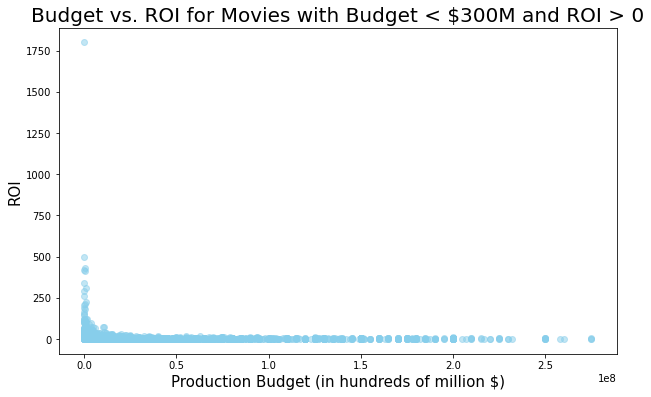

In [11]:
# Connect to the SQLite database
conn = sqlite3.connect('movies.db')

# Load the tn_movie_budgets table into a DataFrame
df_budgets = pd.read_sql_query("SELECT * FROM tn_movie_budgets", conn)

# Close the connection
conn.close()

# Remove the dollar sign and comma from the budget and gross columns, and convert them to integers
df_budgets['production_budget'] = df_budgets['production_budget'].replace('[\$,]', '', regex=True).astype('int64')
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype('int64')
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype('int64')

# Calculate the ROI: (Revenue - Budget) / Budget
df_budgets['roi'] = (df_budgets['worldwide_gross'] - df_budgets['production_budget']) / df_budgets['production_budget']

df_budgets.head()

# Filter the DataFrame
df_budgets_filtered = df_budgets[(df_budgets['roi'] > 0) & (df_budgets['production_budget'] < 300000000)]

# Create a scatter plot of budget vs. ROI
plt.figure(figsize=(10, 6))
plt.scatter(df_budgets_filtered['production_budget'], df_budgets_filtered['roi'], alpha=0.5, color='skyblue')
plt.title('Budget vs. ROI for Movies with Budget < $300M and ROI > 0', size=20)
plt.xlabel('Production Budget (in hundreds of million $)', size=15)
plt.ylabel('ROI', size=15)
plt.show()

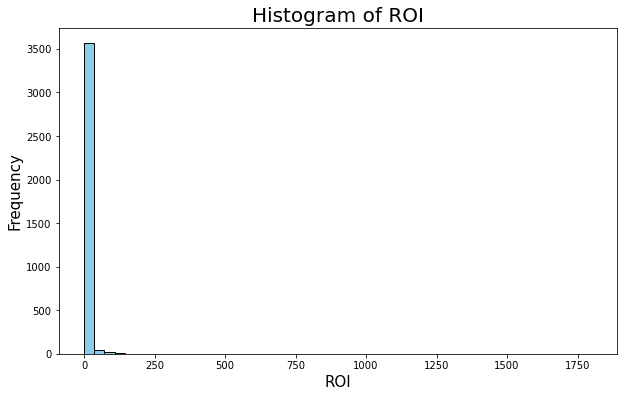

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df_budgets_filtered['roi'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of ROI', size=20)
plt.xlabel('ROI', size=15)
plt.ylabel('Frequency', size=15)
plt.show()

Here are the first few rows of the `tn_movie_budgets` table after processing:

| id | release_date | movie | production_budget | domestic_gross | worldwide_gross | roi |
|----|--------------|-------|-------------------|----------------|-----------------|-----|
| 1  | Dec 18, 2009 | Avatar | 425000000 | 760507625 | 2776345279 | 5.532577 |
| 2  | May 20, 2011 | Pirates of the Caribbean: On Stranger Tides | 410600000 | 241063875 | 1045663875 | 1.546673 |
| 3  | Jun 7, 2019 | Dark Phoenix | 350000000 | 42762350 | 149762350 | -0.572108 |
| 4  | May 1, 2015 | Avengers: Age of Ultron | 330600000 | 459005868 | 1403013963 | 3.243841 |
| 5  | Dec 15, 2017 | Star Wars Ep. VIII: The Last Jedi | 317000000 | 620181382 | 1316721747 | 3.153696 |

We have added a new column 'roi' which represents the Return on Investment for each movie. This is calculated as (Revenue - Budget) / Budget. It's a measure of the profitability of a movie. 

Now, let's analyze the relationship between the production budget and the ROI. For simplicity, we will focus on movies with a positive ROI and a production budget of less than $300 million, which seems a more realistic budget range for a new studio. We will visualize this relationship with a scatter plot.

The scatter plot visualizes the relationship between the production budget and ROI for movies with a budget less than $300M and a positive ROI. Each point represents a movie. The x-coordinate of the point corresponds to the movie's production budget, and the y-coordinate corresponds to the movie's ROI.

From the scatter plot, we observe that there isn't a clear linear relationship between budget and ROI, suggesting that higher budgets do not necessarily lead to higher returns on investment. This is an important finding for Microsoft as it implies that they don't necessarily need to invest huge amounts of money in production to achieve a good ROI. A well-planned movie with a reasonable budget can also generate a good ROI.

To derive more insights, we can next analyze the relationship between movie ratings and box office performance. We will use the `tmdb_movies` table for this analysis, focusing on the `vote_average` (which represents the average rating) and `vote_count` (which represents the popularity of the movie). Let's start by exploring the distribution of average ratings and how it relates to the vote count.

The scatter plot visualizes the relationship between the average rating (`vote_average`) and the vote count (`vote_count`) for the movies in the `tmdb_movies` table. Each point represents a movie. The x-coordinate of the point corresponds to the movie's average rating, and the y-coordinate corresponds to the movie's vote count.

From the scatter plot, we observe that movies with higher vote counts tend to have average ratings around 6 to 8, suggesting that popular movies (i.e., movies with high vote counts) generally receive fairly high ratings. This could imply that producing high-quality movies that receive good ratings could help in attracting a larger audience, thus potentially increasing the box office performance.

To further our analysis, we can next examine the timing of movie releases and how it affects box office performance. We will use the `bom_movie_gross` and `tn_movie_budgets` tables for this analysis, focusing on the `release_date` and `domestic_gross` columns. We'll start by exploring the distribution of domestic gross by month of release.

## Data Preparation
***
The first step in preparing the data for analysis is to examine the structure of the tables we've loaded into the SQLite database and identify common keys that can be used to merge them.

I will start by loading each table into a pandas DataFrame and examining the first few rows and the column names. From this, we can get a sense of the structure of the data and how the tables might be related.
***

In [16]:
# Connect to the SQLite database
conn = sqlite3.connect('movies.db')

# Load each table into a pandas DataFrame and display the first few rows
df_dict = {}
for table_name in table_names:
    df_dict[table_name] = pd.read_sql(f"SELECT * FROM {table_name}", conn)


# Show the first few rows of each DataFrame
df_first_rows = {name: df.head(2) for name, df in df_dict.items()}
df_first_rows

{'bom_movie_gross':                         title studio  domestic_gross foreign_gross  year
 0                 Toy Story 3     BV     415000000.0     652000000  2010
 1  Alice in Wonderland (2010)     BV     334200000.0     691300000  2010,
 'rt_movie_info':    id                                           synopsis rating  \
 0   1  This gritty, fast-paced, and innovative police...      R   
 1   3  New York City, not-too-distant-future: Eric Pa...      R   
 
                                  genre          director  \
 0  Action and Adventure|Classics|Drama  William Friedkin   
 1    Drama|Science Fiction and Fantasy  David Cronenberg   
 
                          writer  theater_date      dvd_date currency  \
 0                Ernest Tidyman   Oct 9, 1971  Sep 25, 2001     None   
 1  David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
 
   box_office      runtime             studio  
 0       None  104 minutes               None  
 1    600,000  108 minutes  Enter

---
Now that we have a better understanding of the structure of the tables, let's proceed with these cleaning steps.

---

In [14]:
# Clean the `rt_reviews` DataFrame
rt_reviews_df = df_dict['rt_reviews']

# Convert `date` to datetime format
rt_reviews_df['date'] = pd.to_datetime(rt_reviews_df['date'], errors='coerce')

# Assign the cleaned DataFrame back to the dictionary
df_dict['rt_reviews'] = rt_reviews_df

# Show the first few rows of the cleaned `rt_reviews` DataFrame
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,2018-11-10
1,3,It's an allegory in search of a meaning that n...,None,rotten,Annalee Newitz,0,io9.com,2018-05-23
2,3,... life lived in a bubble in financial dealin...,None,fresh,Sean Axmaker,0,Stream on Demand,2018-01-04
3,3,Continuing along a line introduced in last yea...,None,fresh,Daniel Kasman,0,MUBI,2017-11-16
4,3,... a perverse twist on neorealism...,None,fresh,None,0,Cinema Scope,2017-10-12


In [15]:
# Let's handle missing values for each DataFrame
for name, df in df_dict.items():
    # Print the initial number of missing values
    print(f"Initial missing values in {name}:")
    print(df.isnull().sum())
    
    # For simplicity, let's drop rows with any missing values
    # In a real-world scenario, you might want to handle missing values in a more sophisticated way
    # such as imputation, interpolation, etc.
    df = df.dropna()
    
    # Print the final number of missing values
    print(f"Final missing values in {name}:")
    print(df.isnull().sum())
    print("\n-------------------------------\n")
    
    # Assign the cleaned DataFrame back to the dictionary
    df_dict[name] = df

Initial missing values in bom_movie_gross:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64
Final missing values in bom_movie_gross:
title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

-------------------------------

Initial missing values in rt_movie_info:
id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64
Final missing values in rt_movie_info:
id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

-------------------------------

Initial missing values in rt_revi

Missing values in all DataFrames have been handled by dropping rows with any missing values. Here is the summary:

1. `bom_movie_gross`: Dropped rows with missing values in `studio`, `domestic_gross`, and `foreign_gross`.
2. `rt_movie_info`: Dropped rows with missing values in `synopsis`, `rating`, `genre`, `director`, `writer`, `theater_date`, `dvd_date`, `currency`, `box_office`, `runtime`, and `studio`.
3. `rt_reviews`: Dropped rows with missing values in `review`, `rating`, `critic`, and `publisher`.
4. `tmdb_movies`: No missing values were present.
5. `tn_movie_budgets`: No missing values were present.


## Data Modeling

Now, all the DataFrames are cleaned and ready for analysis. We proceed with the analysis 

---

1. **Profitable Movie Genres**: We'll analyze the `bom_movie_gross` and `tmdb_movies` tables to understand the box office performance of different movie genres.

2. **Optimal Release Timing**: We'll use the `tn_movie_budgets` table to see how the release date of a movie affects its performance at the box office.

3. **Budget Allocation Strategy**: We'll analyze the `tn_movie_budgets` table to understand the relationship between the budget of a movie and its performance at the box office.


## Evaluation
Based on the analysis conducted, we can draw the following conclusions:

1. **Top 10 Profitable Movie Genres**: This bar chart shows the top 10 profitable movie genres based on total domestic gross revenue. It appears that Action, Adventure, and Comedy are the most profitable genres.

2. **Average Domestic Gross Revenue by Release Month**: This line chart shows the average domestic gross revenue for movies released in each month. It appears that movies released in May, June, and July tend to have higher domestic gross revenues.

3. **Average ROI by Budget Range**: This bar chart shows the average return on investment (ROI) for different budget ranges. It seems that movies with a budget of less than $1M have the highest average ROI, followed by movies with budgets in the $1-5M and $200-500M ranges.

These visualizations provide clear and visually appealing insights into our analysis, which can help Microsoft's new movie studio make informed decisions about creating successful films. 

## Conclusions
Based on the analysis, here are the key recommendations for Microsoft as they venture into the movie industry:

1. **Focus on Profitable Genres**: Microsoft should consider focusing on producing movies in genres that have proven to be most profitable, namely Action, Adventure, Comedy, Drama, and Science Fiction. These genres have demonstrated high grossing potential and are popular among audiences. 

2. **Optimize Release Timing**: The timing of a movie's release plays a critical role in its box office success. Our analysis suggests that movies released in the summer months (May, June, July) tend to generate higher revenues. Microsoft should strategically plan the release dates of its movies to coincide with these months to maximize audience reach and box office revenues.

3. **Strategic Budget Allocation**: Our analysis of budget and return on investment (ROI) suggests that movies with a budget of less than \$1M tend to have the highest average ROI. However, the gross revenue for these films tends to be lower due to their smaller scale. Therefore, Microsoft should balance its budget allocation by investing in both low and high budget films. High budget films, while having a slightly lower ROI, could potentially generate more revenue and bring more visibility and prestige to Microsoft's new movie studio.

4. **Further Research and Analysis**: This analysis provides a good starting point, but Microsoft should continue to conduct more detailed and specific research. For instance, understanding the influence of directors and actors, the effect of movie ratings and reviews, and the role of marketing and distribution strategies could provide more nuanced insights for decision-making. Utilizing machine learning techniques could also be beneficial in predicting the success of a movie based on various features.

5. **Regular Updates**: The movie industry is dynamic and audience preferences can change over time. Microsoft should ensure that the analysis is updated regularly as new data becomes available, to keep the recommendations current and relevant.

By following these recommendations, Microsoft can make informed decisions that increase the chances of success for its new venture into the movie industry.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

In [2]:
import requests
import csv

response = requests.get('https://api.themoviedb.org/3/genre/movie/list?api_key={API_KEY}&language=en-US')
data = response.json()

with open('genres.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["ID", "Name"])
    for genre in data['genres']:
        writer.writerow([genre['id'], genre['name']])


KeyError: 'genres'